In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta

import math
import numpy as np
import pandas as pd
import matplotlib as mpl

from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"

In [3]:
def engage_read(category, eval_days = [90, 135, 180, 225, 270]):    
    with open(os.path.join(engage_dataset_base, "{}.json".format(category)), "r") as f:
        dataset_json = f.readlines()
    dataset = {}
    
    vids_set = set()
    for line in tqdm(dataset_json, desc="{} in engage".format(category)):
        record = json.loads(line)
        try:        
            day = [int(x) for x in record['insights']['days'].split(",")]                        
            if len(day) < eval_days[-1]: # filter out videos of short history
                continue                
            vals = {
                "day_zero": record['insights']['startDate'], 
                "days": day, 
                "viewCounts": [int(x) for x in record['insights']['dailyView'].split(",")],
                "shares": [int(x) for x in record['insights']['dailyShare'].split(",")],
            }
        except:
            continue
        dataset[record['id']] = vals
        
        if record['id'] in vids_set: 
            continue
        else: 
            vids_set.add(record['id'])
    print("Engage {} size: {}".format(category, len(dataset.keys())))
    return dataset

In [4]:
def read_vids(inpath):
    res = dict()
    with open(inpath, 'r', encoding="utf-8") as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row)==0: continue
            category = row[0]
            vids = row[1:]
            res[category] = vids
    
    report = []
    for cat, vids in res.items():
        report.append(f"{cat}:{len(vids)}")
    print("Vids(filtered) in each category:\n"+"; ".join(report))
    return res

In [5]:
# all category
vids_filter_all = read_vids(file_vids_filter_all)

category = categories_eligible[4]
engage_dataset = engage_read(category)
vids = vids_filter_all[category]
num = 0

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112


film in engage: 100%|███████████████████████████████████████████████████████| 194891/194891 [00:17<00:00, 11402.48it/s]


Engage film size: 42439


In [6]:
def visual_single_scatter(ax, vid, vdata):
    days, views = vdata["days"], vdata["viewCounts"]
    ax.scatter(days, views, s = 6.0)
    ax.set_xticks([30*x for x in range(len(days)//30+1)])
    ax.set_title("Viewcount history for video {}".format(vid))
    ax.set_xlabel("Num. days after upload")
    ax.set_ylabel("Daily viewcounts")

In [7]:
# fig = plt.figure(figsize=(16, 16))
# for num in range(4):
#     ax = fig.add_subplot(2,2,num+1)
#     vid = vids[num]
#     visual_single_scatter(ax, vid, engage_dataset[vid])

In [8]:
# fig = plt.figure(figsize=(16, 16))
# for num in range(4, 8):
#     ax = fig.add_subplot(2,2,(num)%4+1)
#     vid = vids[num]
#     visual_single_scatter(ax, vid, engage_dataset[vid])

In [9]:
# fig = plt.figure(figsize=(16, 16))
# for num in range(8, 12):
#     ax = fig.add_subplot(2,2,(num)%4+1)
#     vid = vids[num]
#     visual_single_scatter(ax, vid, engage_dataset[vid])

In [10]:
def visual_single_cdf(ax, vid, vdata):
    days, views = vdata["days"], vdata["viewCounts"]
    
    view_cdf = []
    view_acc, view_total = 0, sum(views)
    for i in range(len(views)):
        view_acc += views[i]
        view_cdf.append(view_acc/view_total)
    
    ax.bar(days, view_cdf)
    ax.set_xticks([30*x for x in range(len(days)//30+1)])
    ax.set_title("Viewcount cdf for video {}".format(vid))
    ax.set_xlabel("Num. days after upload")
    ax.set_ylabel("Cumulative viewcount percentage")

In [11]:
# fig = plt.figure(figsize=(16, 16))
# for num in range(4):
#     ax = fig.add_subplot(2,2,(num)%4+1)
#     vid = vids[num]
#     visual_single_cdf(ax, vid, engage_dataset[vid])

In [12]:
# fig = plt.figure(figsize=(16, 16))
# for num in range(4, 8):
#     ax = fig.add_subplot(2,2,(num)%4+1)
#     vid = vids[num]
#     visual_single_cdf(ax, vid, engage_dataset[vid])

In [ ]:
# fig = plt.figure(figsize=(16, 16))
# for num in range(8, 12):
#     ax = fig.add_subplot(2,2,(num)%4+1)
#     vid = vids[num]
#     visual_single_cdf(ax, vid, engage_dataset[vid])

#### Examine individuals to find typical samples

In [13]:
start, end = 0, 4

In [42]:
start, end = start + 8, end + 8

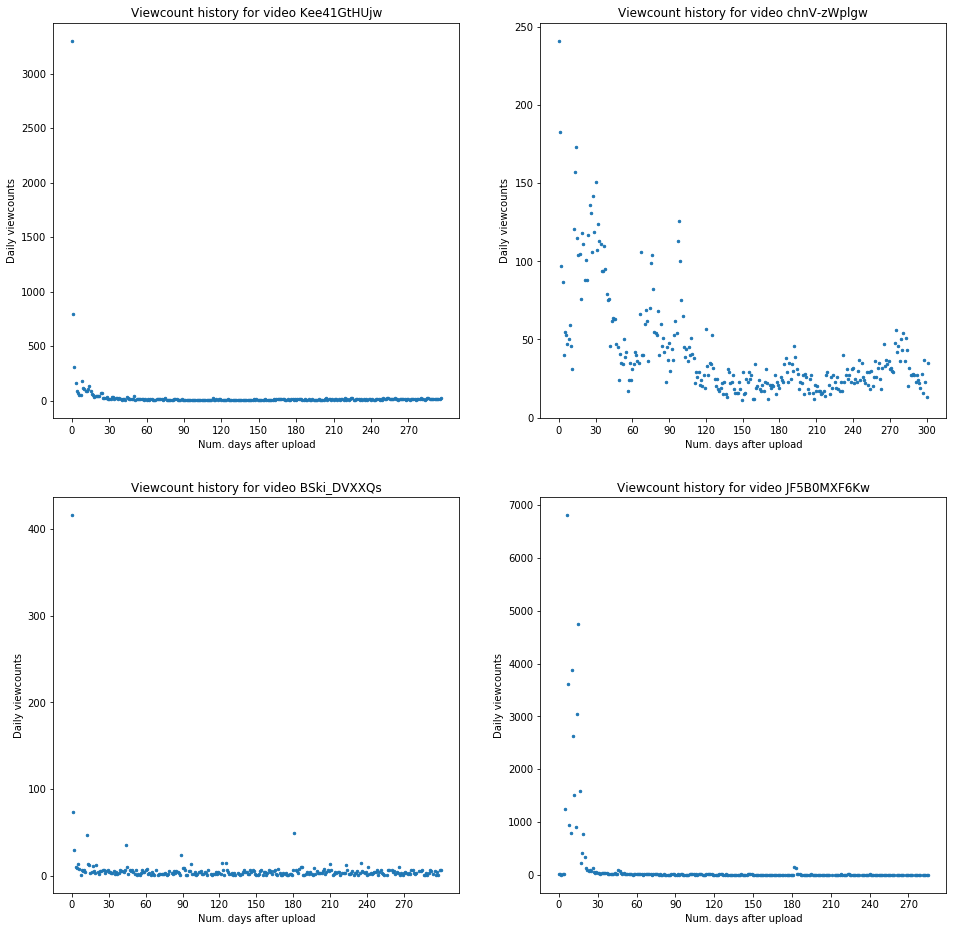

In [68]:
fig = plt.figure(figsize=(16, 16))
for num in range(start, end):
    ax = fig.add_subplot(2,2,(num)%4+1)
    vid = vids[num]
    visual_single_scatter(ax, vid, engage_dataset[vid])
start, end = start + 4, end + 4